In [24]:
#线性分类解析：https://ljalphabeta.gitbooks.io/python-/content/section1.html
#下载数据
import requests
import urllib.request
url="https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/australian_scale"
#r=requests.get(url)   #方式一：request获得数据内容，传回二进制数据，需要用Python3的BytesIO(r.content)来获取
urllib.request.urlretrieve(url, "australian_scale")   #方式二：下载数据集


#加载数据：使用sklearn库的load_svmlight_file函数读取数据
from sklearn.datasets import load_svmlight_file
import numpy as np
from io import BytesIO

#X,y=load_svmlight_file(f=BytesIO(r.content,n_features=14) #对应方式一
X,y=load_svmlight_file("australian_scale",n_features=14)  #对应方式二
                       
#print(type(X),type(y))
#print(X.shape,y.shape)
#X=X.data.reshape(X.shape)   #很重要！！！X数据格式需转换成nd.array形式
X=X.toarray()                   #很重要！！！X数据格式需转换成nd.array形式
y=np.reshape(y,(y.shape[0],1))  #很重要！！！（354，）需转换成（354,1）,否则后面出错
#print type(X)
#print(X.shape,y.shape)

#数据处理：使用train_test_split函数切分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)   #切割数据集
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(483, 14)
(483, 1)
(207, 14)
(207, 1)


In [25]:
#线性分类及梯度下降
import random
def svm(X_train,y_train,W,C,lr):  #svm算法优化模型
    m,dim=np.shape(X_train)
    loss=1/2*np.dot(W.T,W)       
    grad = np.ones([dim,1])       #初始化W全为1或的n*1梯度
    for i in range(0,m):       
        y = y_train[i][0]         # y其实就是label
        X = X_train[i]            #X表示一个样本数据
        h=1 - np.dot(y,np.dot(W.T,X.reshape(dim,1)))
        if h<=0:      
            grad+=W      
        else:        
            grad+=W-C*(np.dot(y.reshape(1,1),X.reshape(1,dim)).T)
            loss+=C*h
    W-=lr*grad/m        #更新权重, lr是学习速率       
    return loss[0][0]

def svm_predict(X_train,y_train,W):   #预测正确率
    m,dim=np.shape(X_train)
    num_correct = 0
    acc=[]
    yp=np.dot(X_train,W)
    for i in range(0,m):
        predict=-1
        target=y_train[i][0]
        if(yp[i][0]>0):
            predict=1
        if(predict*target)>0:
            num_correct+=1   
    return num_correct*1.0/m   

def J(W,X_test,y_test,C):     #逻辑回归,计算单个样本的损失函数
    loss=1/2*np.dot(W.T,W) 
    for i in range(0,m):       
        y = y_train[i][0]         # y其实就是label
        X = X_train[i]            #X表示一个样本数据
        h=1 - np.dot(y,np.dot(W.T,X.reshape(dim,1)))
        if h>=0:           
            loss+=C*h
    return loss[0][0]

In [26]:
if __name__ == "__main__":

    #设置参数
    iterations=500    #迭代次数
    lr = 0.01        #学习速率，用于调整训练收敛的速度
    C=0.9            #正则化常数
    
    m,dim=np.shape(X_train)
    acces_train=[]
    acces_test=[]
    losses_train=[]
    losses_test=[]
    W = np.ones([dim,1])     #初始化W全为1或的n*1向量
    
    for i in range(0,iterations):       
        loss=svm(X_train,y_train,W,C,lr)
        losses_train.append(loss)
        
        loss=J(W,X_test,y_test,C)
        losses_test.append(loss)
        
        acc = svm_predict(X_train,y_train,W) 
        acces_train.append(acc)
        
        acc = svm_predict(X_test,y_test,W) 
        acces_test.append(acc)
        #print("epochs:",i,"\t loss: ", loss,"\t accuracy: ",acc)

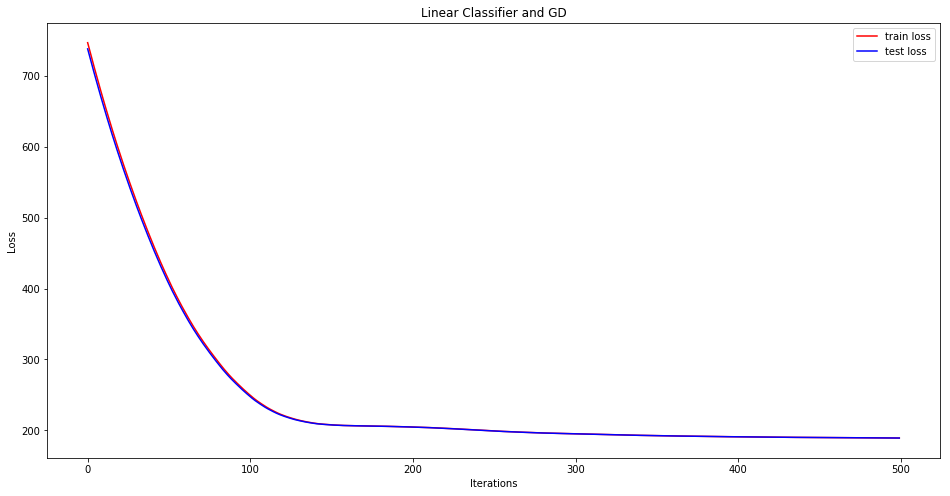

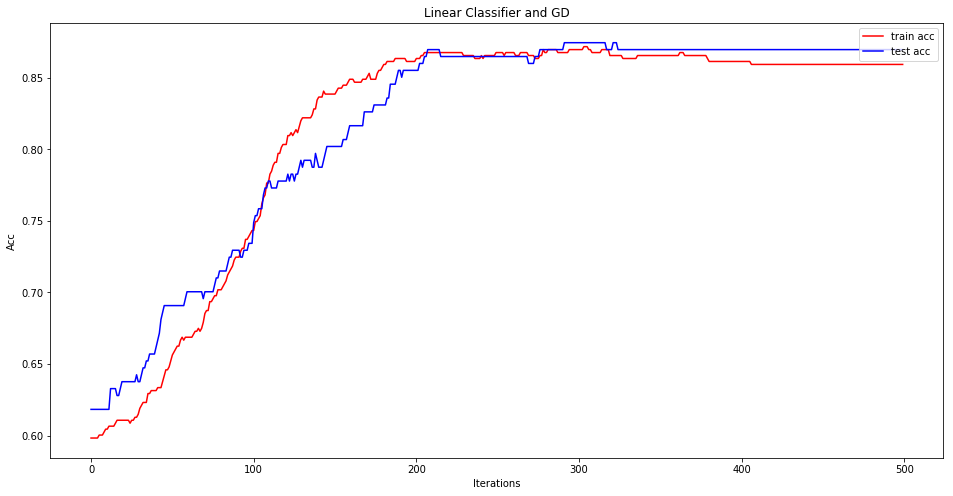

In [27]:
#画出图形
%matplotlib inline
import matplotlib.pyplot as plt

#plt.subplot(1,2,1)
plt.figure(figsize=(16,8))
plt.plot(losses_train,color='red',label="train loss")
plt.plot(losses_test,color='blue',label="test loss")
plt.legend(loc='upper right')
plt.title("Linear Classifier and GD")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

#plt.subplot(1,2,2)
plt.figure(figsize=(16,8))
plt.plot(acces_train,color='red',label="train acc")
plt.plot(acces_test,color='blue',label="test acc")
plt.legend(loc='upper right')
plt.title("Linear Classifier and GD")
plt.xlabel("Iterations")
plt.ylabel("Acc")
plt.show()